In [1]:
import pandas as pd 
import numpy as np  
from pyfile.connect2db import * # 데이터베이스 연결
conn,cursor = create_con()
# DB에 있는 테이블 목록 확인하기
pd.read_sql('select tbl_name from sqlite_master;',conn)

,tbl_name
0,cafe_post_list_naver_test
1,cafe_post_comment_naver
2,cafe_post_contents_naver
3,cafe_post_list_naver
4,comments_hy_kona_naver
5,commnets_kia_stonic_naver
6,commnets_sam_qm3_naver
7,commnets_ssy_tivoli_naver
8,kona
9,kona_total


# 데이터 시각화를 통한 탐색적 분석 

In [2]:
import matplotlib.pyplot as plt 
import matplotlib
from plotnine import *
%matplotlib inline

#한글처리 
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname='c:/windows/fonts/NanumGothicCoding.ttf').get_name()
rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

## 연령별 구매 비중 그래프

In [3]:
df1 = pd.read_sql('''select * from kona_total 
union select * from stonic_total;''',conn)
df2 = pd.read_sql('''select * from tivoli_total  
union select * from qm3_total;''',conn)
car_total = df1.append(df2)

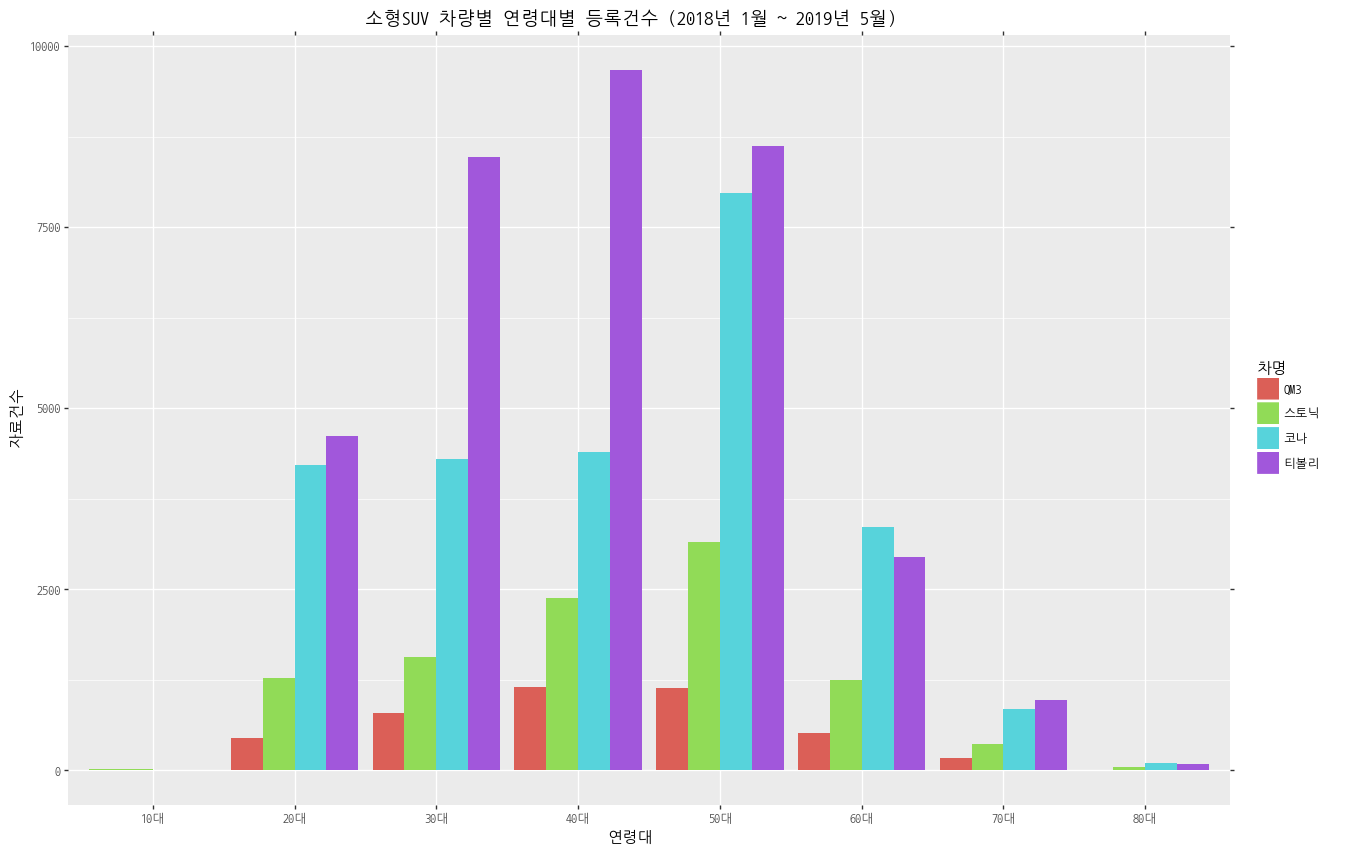

<ggplot: (-9223371899579905876)>

In [4]:
# 차량별 연령대별 등록건수
car_nsy = car_total[['차명','성별','연령대','자료건수']].copy()
car_nsy = car_nsy.groupby(['차명', '성별', '연령대']).agg({'자료건수':np.sum}).reset_index()

(ggplot(car_nsy) 
 + aes(x = '연령대', y = '자료건수', fill = '차명')
 + geom_bar(stat = 'identity', position = 'dodge')
 + ggtitle('소형SUV 차량별 연령대별 등록건수 (2018년 1월 ~ 2019년 5월)')
 + theme(text = element_text(family = 'NanumGothicCoding'), figure_size = (15, 10))
)

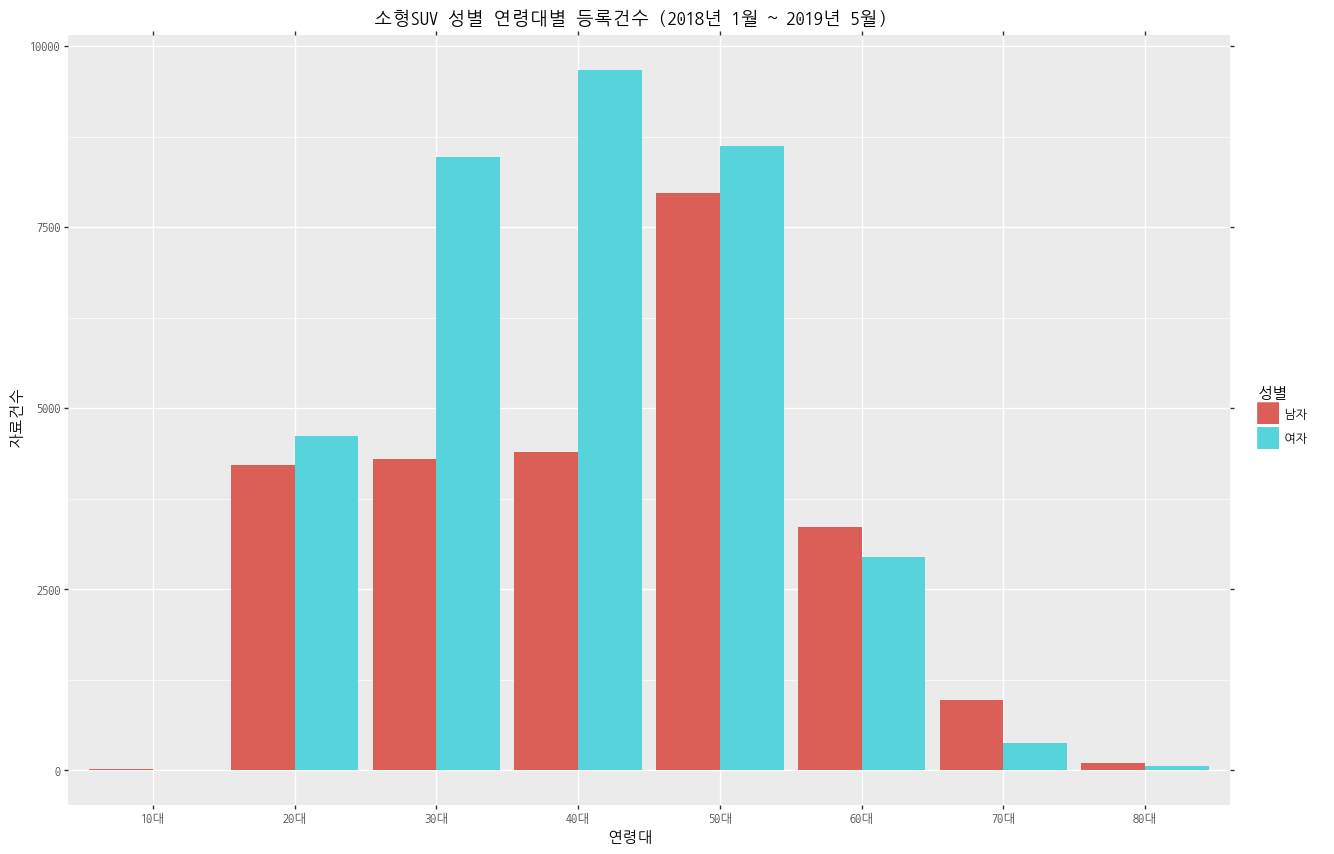

<ggplot: (-9223371899579905988)>

In [5]:
(ggplot(car_nsy) 
 + aes(x = '연령대', y = '자료건수', fill = '성별')
 + geom_bar(stat = 'identity', position = 'dodge')
 + ggtitle('소형SUV 성별 연령대별 등록건수 (2018년 1월 ~ 2019년 5월)')
 + theme(text = element_text(family = 'NanumGothicCoding'), figure_size = (15, 10))
)

## 월별, 연령별, 성별 구매 비중 그래프 

In [6]:
from pyfile.data_frame_for_plot import *

In [8]:
cs_dftotal,f_dftotal = create_plot_data(car_total)

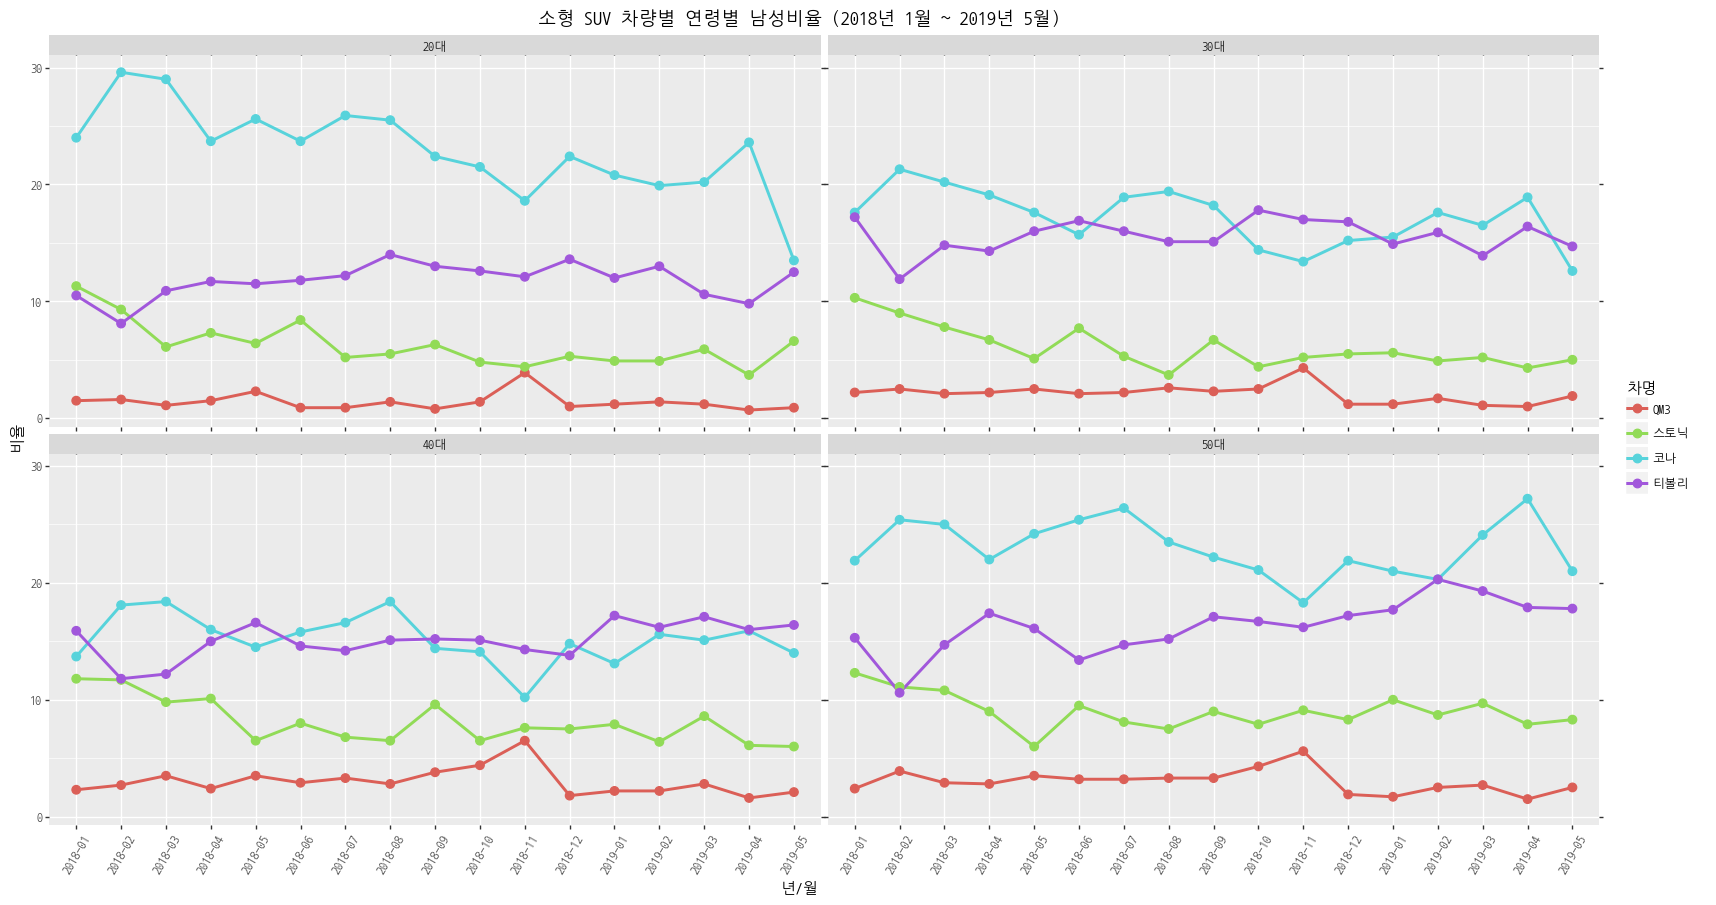

<ggplot: (137277793365)>

In [9]:
(ggplot(cs_dftotal)
+ aes(x='Months', y='비율', colour = '차명', group = '차명')
+ geom_line(size=1.2)
+ geom_point(size=3)
+ xlab('년/월')
+ facet_wrap('연령대')
+ ggtitle('소형 SUV 차량별 연령별 남성비율 (2018년 1월 ~ 2019년 5월)')
+ theme(text=element_text(family='NanumGothicCoding'), figure_size=(20,10), 
       axis_text_x=element_text(rotation=60))
)

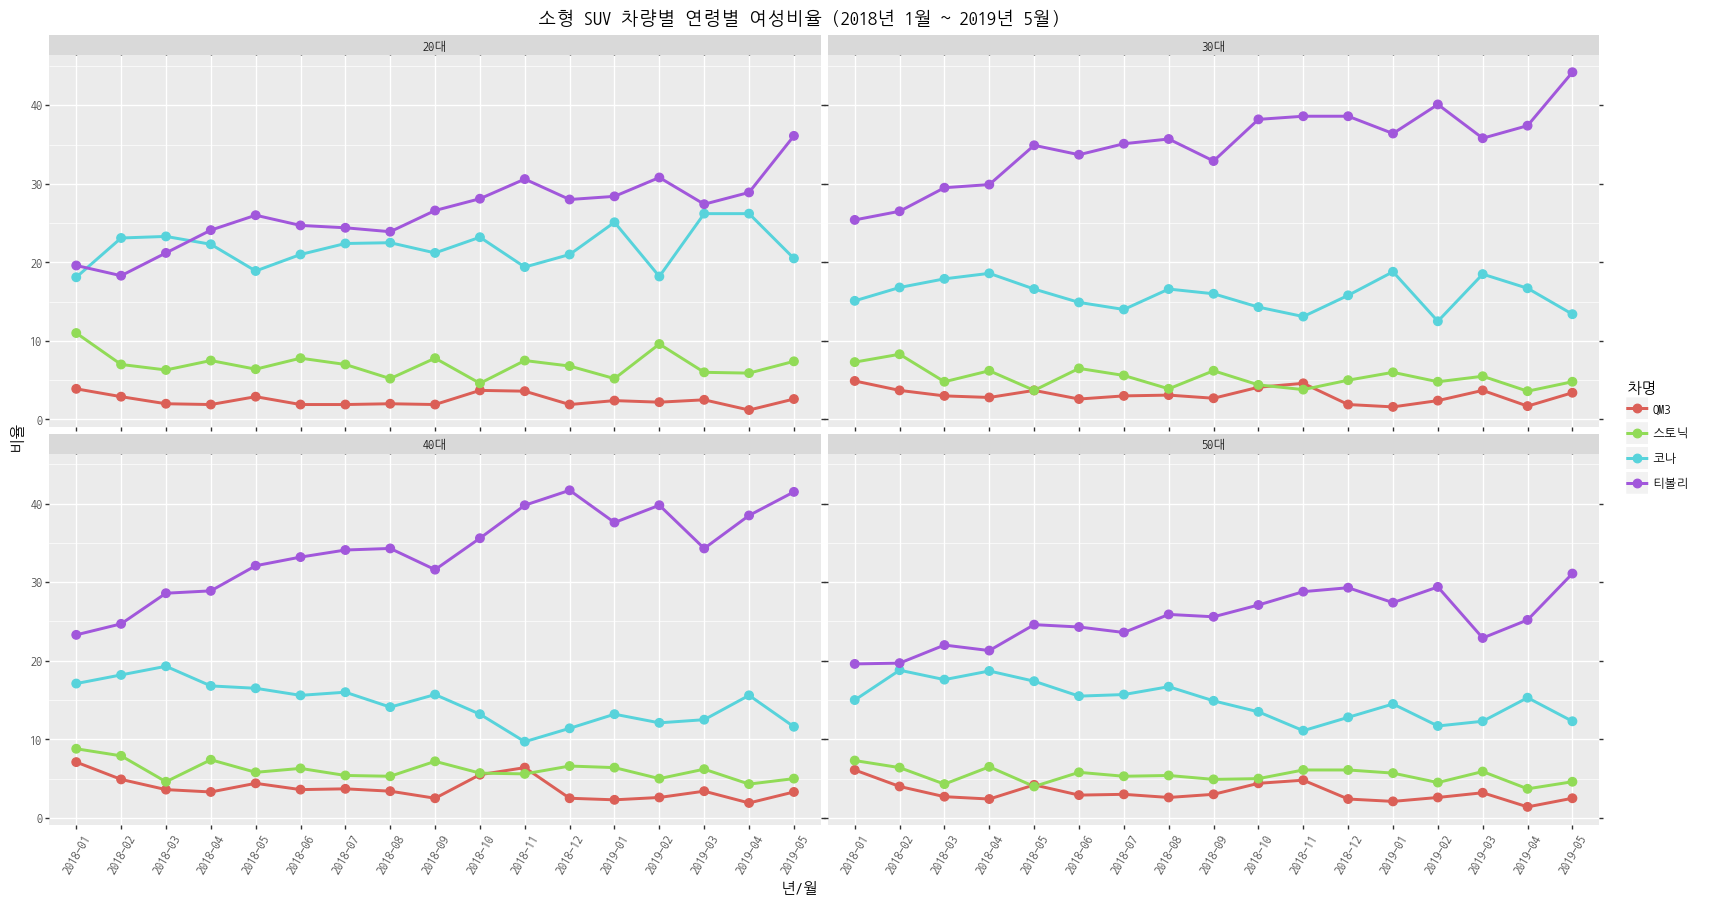

<ggplot: (137277711543)>

In [10]:
(ggplot(f_dftotal)
+ aes(x='Months', y='비율', colour = '차명', group = '차명')
+ geom_line(size=1.2)
+ geom_point(size=3)
+ xlab('년/월')
+ facet_wrap('연령대')
+ ggtitle('소형 SUV 차량별 연령별 여성비율 (2018년 1월 ~ 2019년 5월)')
+ theme(text=element_text(family='NanumGothicCoding'), figure_size=(20,10), 
       axis_text_x=element_text(rotation=60))
)